<a href="https://colab.research.google.com/github/abhiram27/DIP/blob/main/DIP_Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

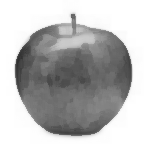

In [1]:
#The Kuwahara filter is an image processing technique that smooths images while preserving edges. It works by analyzing small regions around each pixel, choosing the most uniform region, and applying its average color to the pixel. This creates a distinctive effect that reduces noise and gives images a painterly, almost cartoonish appearance, while maintaining sharp boundaries between different areas of the image.

import cv2
import numpy as np

def kuwahara_filter(image, window_size=5):
    padded_img = cv2.copyMakeBorder(image, window_size//2, window_size//2, window_size//2, window_size//2, cv2.BORDER_REFLECT) # This line and subsequent lines should be indented
    output_img = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            regions = [
                padded_img[y:y+window_size, x:x+window_size],
                padded_img[y:y+window_size, x+window_size//2:x+window_size+window_size//2],
                padded_img[y+window_size//2:y+window_size+window_size//2, x:x+window_size],
                padded_img[y+window_size//2:y+window_size+window_size//2, x+window_size//2:x+window_size+window_size//2]
            ]
            means = [np.mean(r) for r in regions]
            variances = [np.var(r) for r in regions]
            min_variance_index = np.argmin(variances)
            output_img[y, x] = means[min_variance_index]
    return output_img

image = cv2.imread('apple.png', cv2.IMREAD_GRAYSCALE)
kuwahara_image = kuwahara_filter(image)
# Use cv2_imshow from google.colab.patches instead of cv2.imshow
from google.colab.patches import cv2_imshow
cv2_imshow(kuwahara_image)
cv2.waitKey(0)
cv2.destroyAllWindows()